In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

## Reading the Data

In [59]:
df = pd.read_csv('dataset.csv')

In [60]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## Data Cleaning & Pre Processing

In [61]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean()

# Filter columns with more than 70% null values
columns_with_high_nulls = null_percentage[null_percentage > 0.1].index

# Access the columns in the DataFrame
selected_columns = df[columns_with_high_nulls]

# Display the result
print(selected_columns)

      Unnamed: 133
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
...            ...
4915           NaN
4916           NaN
4917           NaN
4918           NaN
4919           NaN

[4920 rows x 1 columns]


In [62]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [63]:
df.drop('Unnamed: 133',axis=1,inplace=True)

In [64]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows['prognosis'].unique())

41

In [65]:
df_cleaned = df.drop_duplicates()

In [66]:
df_cleaned

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [67]:
zero_columns = df_cleaned.columns[df_cleaned.eq(0).all()]

# Print the columns with only "0" values
print("Columns with only '0' values:", zero_columns)

Columns with only '0' values: Index(['fluid_overload'], dtype='object')


## Initial DT Model 

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = df_cleaned.drop('prognosis', axis=1)
target = df_cleaned['prognosis']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.66
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.50      0.67         2
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       1.00      0.67      0.80         3
                    Alcoholic hepatitis       0.00      0.00      0.00         1
                                Allergy       1.00      0.67      0.80         3
                       Bronchial Asthma       1.00      0.67      0.80         3
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       0.50      0.50      0.50         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.0

## Finding Highly Correlated Pairs of Features

In [69]:
def find_correlated_pairs(data, threshold):
    correlation_matrix = data.corr()

    # Set the correlation threshold
    threshold = threshold  # Adjust this threshold as needed

    # Find feature pairs with correlation above the threshold
    highly_correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
                highly_correlated_pairs.append(pair)

    # Create a dictionary to store correlated features for each unique feature
    correlated_features_dict = {}
    for pair in highly_correlated_pairs:
        if pair[0] not in correlated_features_dict:
            correlated_features_dict[pair[0]] = [pair[1]]
        else:
            correlated_features_dict[pair[0]].append(pair[1])

        if pair[1] not in correlated_features_dict:
            correlated_features_dict[pair[1]] = [pair[0]]
        else:
            correlated_features_dict[pair[1]].append(pair[0])

    # Display correlated features for each unique feature
    for feature, correlated_features in correlated_features_dict.items():
        print(f"{feature} is strongly correlated to \033[1m{len(correlated_features)}\033[0m feature(s): {', '.join(correlated_features)}")

    return highly_correlated_pairs,correlated_features_dict


In [70]:
pairs,pair_dict = find_correlated_pairs(features,0.75)

continuous_sneezing is strongly correlated to 6 feature(s): throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, loss_of_smell
throat_irritation is strongly correlated to 6 feature(s): continuous_sneezing, redness_of_eyes, sinus_pressure, runny_nose, congestion, loss_of_smell
redness_of_eyes is strongly correlated to 6 feature(s): continuous_sneezing, throat_irritation, sinus_pressure, runny_nose, congestion, loss_of_smell
sinus_pressure is strongly correlated to 6 feature(s): continuous_sneezing, throat_irritation, redness_of_eyes, runny_nose, congestion, loss_of_smell
runny_nose is strongly correlated to 6 feature(s): continuous_sneezing, throat_irritation, redness_of_eyes, sinus_pressure, congestion, loss_of_smell
congestion is strongly correlated to 6 feature(s): continuous_sneezing, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, loss_of_smell
loss_of_smell is strongly correlated to 6 feature(s): continuous_sneezing, throat_irritation, rednes

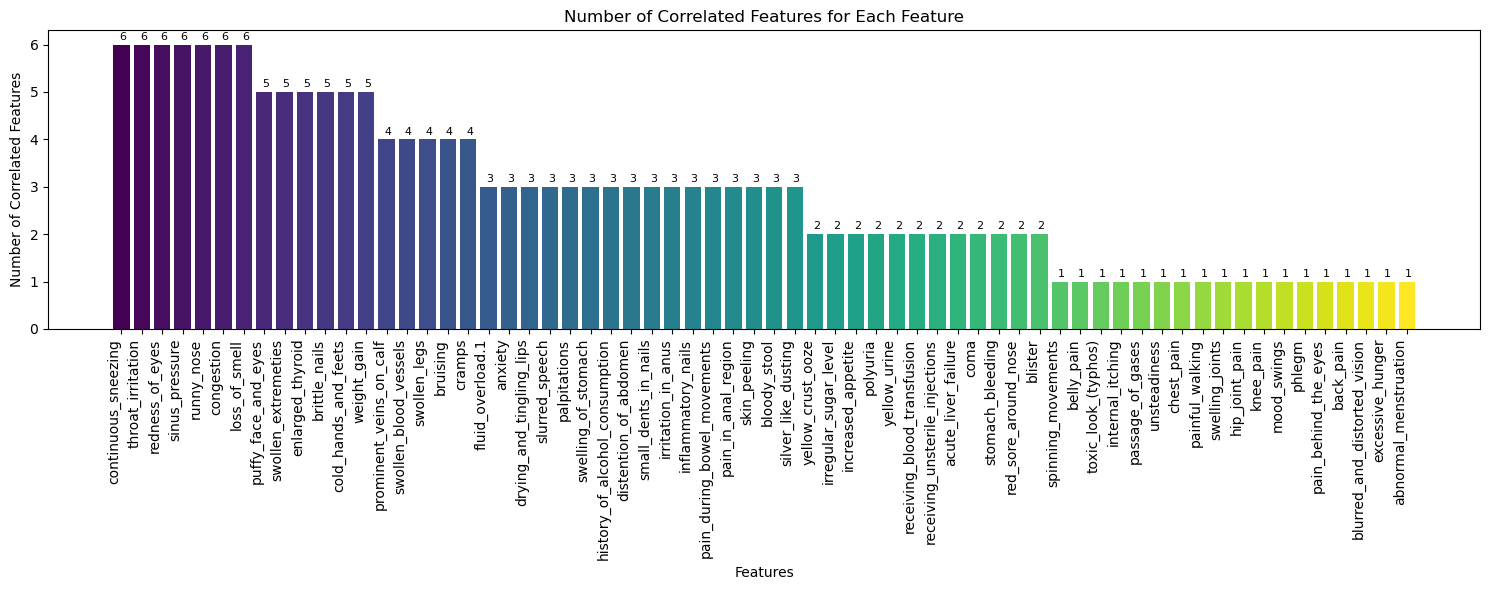

In [71]:

feats = list(pair_dict.keys())
correlation_counts = [len(correlated_features) for correlated_features in pair_dict.values()]

# Sort features based on the number of correlated features
sorted_indices = np.argsort(correlation_counts)[::-1]  # Sort in descending order
feats = [feats[i] for i in sorted_indices]
correlation_counts = [correlation_counts[i] for i in sorted_indices]

# Create a color gradient for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(feats)))

# Create a bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(feats, correlation_counts, color=colors)

# Add data labels
for bar, count in zip(bars, correlation_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), fontsize=8, color='black')

plt.xlabel('Features')
plt.ylabel('Number of Correlated Features')
plt.title('Number of Correlated Features for Each Feature')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


## Dropping the mutually correlated features

In [72]:
temp = features.copy()

In [73]:
def drop_pairs(pairs,data):
    for pair in pairs:
        if pair[0] in data.columns and pair[1] in data.columns:
            print(pair[0])
            data.drop(pair[0],axis=1,inplace=True)
    return data


In [74]:
temp = drop_pairs(pairs=pairs,data=temp)


continuous_sneezing
weight_gain
anxiety
cold_hands_and_feets
mood_swings
irregular_sugar_level
pain_behind_the_eyes
yellow_urine
acute_liver_failure
swelling_of_stomach
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
cramps
bruising
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroid
brittle_nails
drying_and_tingling_lips
slurred_speech
knee_pain
swelling_joints
spinning_movements
passage_of_gases
toxic_look_(typhos)
increased_appetite
receiving_blood_transfusion
coma
distention_of_abdomen
history_of_alcohol_consumption
skin_peeling
silver_like_dusting
small_dents_in_nails
blister
red_sore_around_nose


In [75]:
temp

,itching,skin_rash,nodal_skin_eruptions,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Now testing a Randomn Forest Model

In [76]:
X_train, X_test, y_train, y_test = train_test_split(temp, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = RandomForestClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 1.00
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.0

## PCA & Feature Selection

In [77]:
from sklearn.decomposition import PCA

In [78]:
n_components = 50
pca = PCA(n_components=n_components)

In [79]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

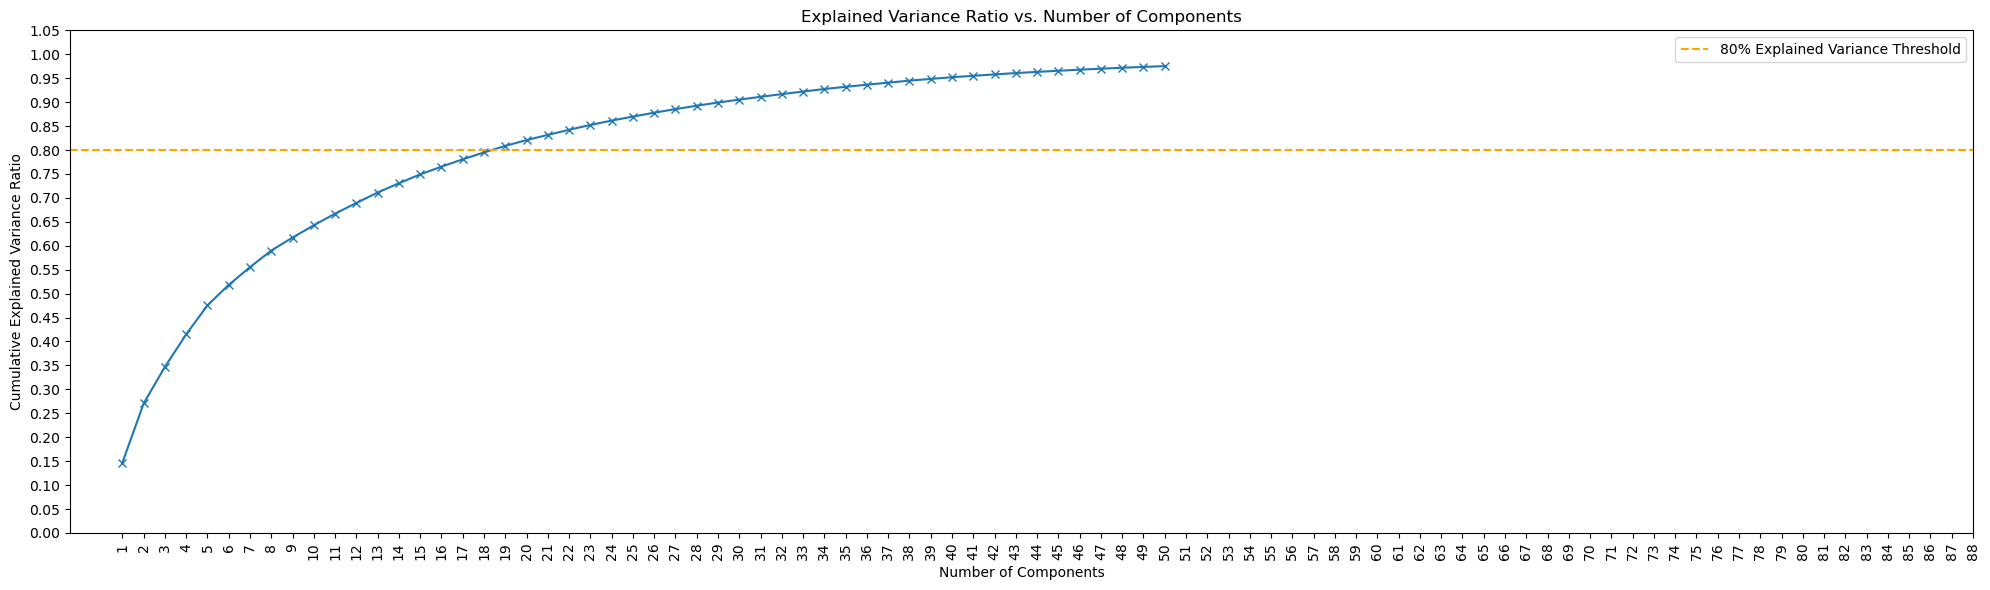

In [80]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.style.use('default')

plt.figure(figsize=(20, 6))
plt.plot(range(1, X_train_pca.shape[1] + 1), explained_variance_ratio_cumulative, marker='x', linestyle='-')
plt.axhline(y=0.80, color='orange', linestyle='--', label='80% Explained Variance Threshold')

plt.xscale('linear')  # Use 'log' for logarithmic scale
plt.yscale('linear')  # Use 'log' for logarithmic scale
plt.xticks(np.arange(1, X_train.shape[1] + 1, 1))  # Add minor ticks on the x-axis
plt.yticks(np.arange(0, 1.1, 0.05))  # Add minor ticks on the y-axis

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(False)
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.tight_layout()


plt.show()

In [81]:
n_components = 20
pca = PCA(n_components=n_components)

In [82]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [83]:
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.97
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.67      0.67      0.67         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       0.75      1.00      0.86         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.0

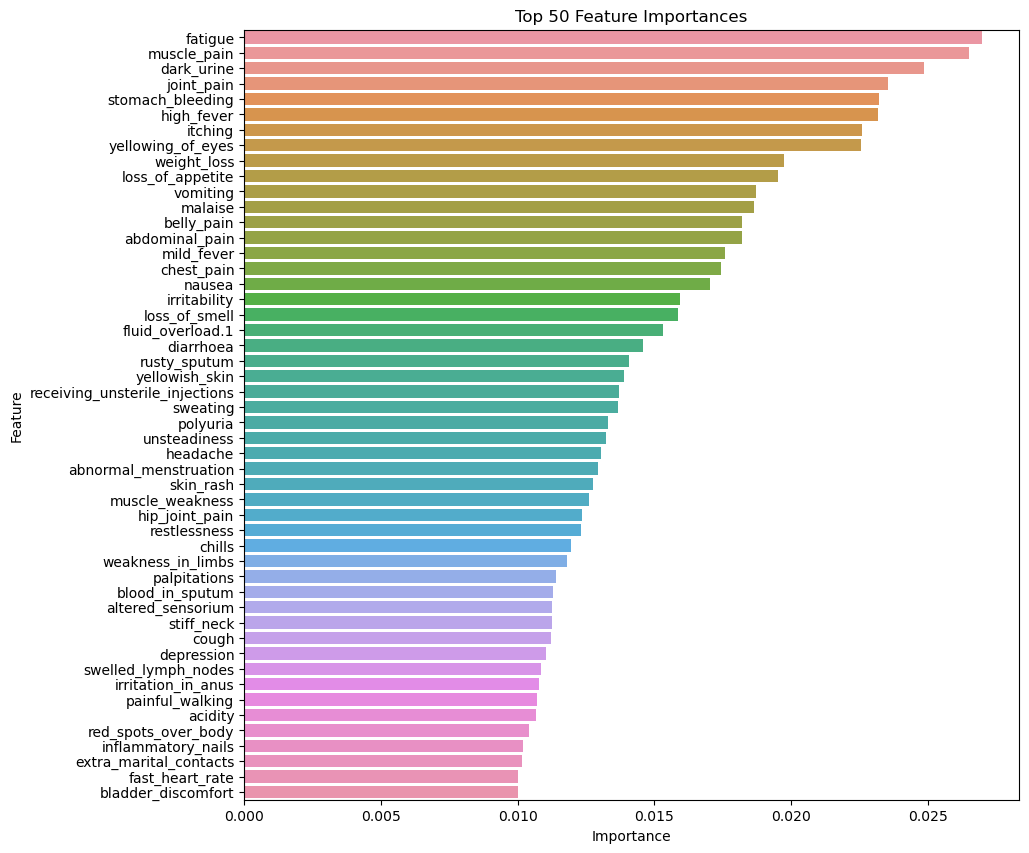

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(X_train,y_train)

feature_importances = ET.feature_importances_
feature_names = temp.columns

# Create a DataFrame to store feature names and importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Select the top 50 features based on importance values
top_50_importances = importance_df.nlargest(50, 'Importance')

# Sort the in descending order
top_50_importances = top_50_importances.sort_values(by='Importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=top_50_importances)
plt.title('Top 50 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Encode string classes to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Neural Network Model and Learning Curves

In [331]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

NN_cls = Sequential([
    Dense(60, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.002)),
    Dropout(0.1),
    Dense(30, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.002)),
    Dropout(0.1),
    Dense(15, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.002)),
    Dropout(0.1),
    Dense(len(label_encoder.classes_), activation='softmax', name='L4')
])

# Compile the model with categorical crossentropy loss
NN_cls.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(0.0005),
    metrics=['accuracy']
)

# Train the model
history = NN_cls.fit(
    X_train, y_train_encoded,
    epochs=500, validation_data=(X_test, y_test_encoded)
)

Epoch 1/500
8/8 [==============================] - 1s 25ms/step - loss: 3.9854 - accuracy: 0.0165 - val_loss: 3.9676 - val_accuracy: 0.0492
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 3.9615 - accuracy: 0.0288 - val_loss: 3.9444 - val_accuracy: 0.0492
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 3.9349 - accuracy: 0.0535 - val_loss: 3.9243 - val_accuracy: 0.0492
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 3.9161 - accuracy: 0.0453 - val_loss: 3.9060 - val_accuracy: 0.0492
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 3.8954 - accuracy: 0.0453 - val_loss: 3.8877 - val_accuracy: 0.0984
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 3.8817 - accuracy: 0.0658 - val_loss: 3.8696 - val_accuracy: 0.0984
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 3.8585 - accuracy: 0.0864 - val_loss: 3.8499 - val_accuracy: 0.1148
Epoch 8/500
8/8 [=========

In [347]:
y_pred = np.argmax(NN_cls.predict(X_test), axis=1)

# Inverse transform the predicted labels to get them back to string format
y_pred_original = label_encoder.inverse_transform(y_pred)

# Print classification report
print(f"Accuracy is : {accuracy_score(y_test, y_pred_original)}")
print(classification_report(y_test, y_pred_original))

2/2 [==============================] - 0s 2ms/step


Accuracy is : 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.00         2
         

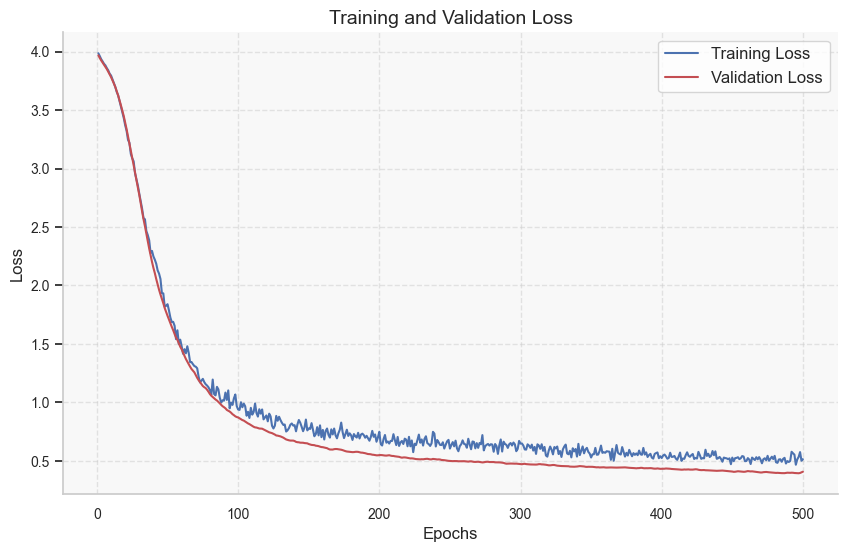

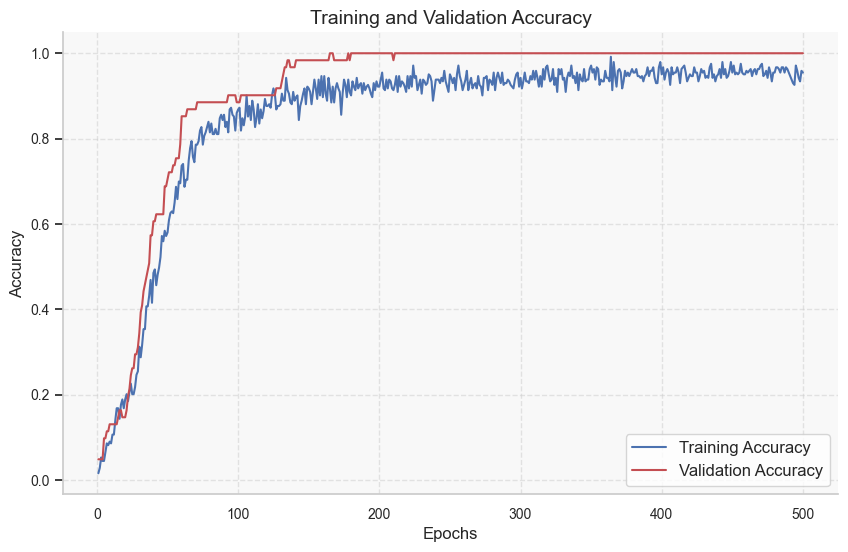

In [333]:
sns.set(style="whitegrid")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the learning curves
epochs = range(1, len(train_loss) + 1)

# Plot loss curves
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set the background color
plt.gca().set_facecolor('#f8f8f8')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=True, right=False, labelsize=10)

# Remove the spines
sns.despine()

# Add a sleek border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# Plot accuracy curves
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set the background color
plt.gca().set_facecolor('#f8f8f8')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=True, right=False, labelsize=10)

# Remove the spines
sns.despine()

# Add a sleek border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


## Testing SVM Model and HyperParameter Tuning using two techniques : Grid Search and Genetic Algorithm Search

In [37]:
from sklearn.svm import SVC
SVM_Model=SVC()
SVM_Model.fit(X_train,y_train)
ypred3=SVM_Model.predict(X_test)

In [38]:
print(f"Accuracy of SVM is : {accuracy_score(y_test, ypred3)}")

Accuracy of SVM is : 0.9672131147540983


In [351]:
n_estimators = [100, 300, 700, 1000]
criterion = ['gini','entropy','log_loss']
max_depth = [10,20,50,100]
bootstrap=[True,False]
grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, bootstrap=bootstrap) # creating dictionary to store the lists

In [353]:
from sklearn.model_selection import GridSearchCV
GC_RF1 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0) # creating grid search object for xgb
GC_RF1_result = GC_RF1.fit(X_test, y_test) # fitting the grid search on the training data



In [354]:
GC_RF1_result.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [355]:
model.set_params(**GC_RF1_result.best_params_)

RandomForestClassifier(max_depth=10, random_state=42)

In [356]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.95
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.00      0.00      0.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.0

In [48]:
from sklearn_genetic import GASearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn_genetic.space import Continuous, Categorical, Integer
param_grid = { 'splitter' : Categorical(['best','random']),
              'criterion' : Categorical(['gini','entropy','log_loss']),
               'max_depth' : Integer(10,500)
             }
cv = StratifiedKFold(n_splits=3, shuffle=True)



In [49]:
DT_Model=DecisionTreeClassifier()
DT_evolved = GASearchCV(estimator=DT_Model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=50,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [50]:
DT_evolved.fit(X_test,y_test)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.543254	0.0421432  	0.624603   	0.49127    
1  	17    	0.58619 	0.0317524  	0.624603   	0.510317   
2  	18    	0.59746 	0.0212479  	0.607937   	0.54127    
3  	18    	0.637222	0.0190491  	0.673016   	0.607937   
4  	15    	0.657302	0.0208378  	0.690476   	0.624603   
5  	19    	0.670397	0.0175756  	0.690476   	0.64127    
6  	18    	0.665397	0.0168142  	0.690476   	0.640476   
7  	17    	0.670635	0.0158094  	0.690476   	0.642063   
8  	17    	0.667222	0.0183093  	0.690476   	0.640476   
9  	14    	0.680556	0.0167355  	0.690476   	0.64127    
10 	19    	0.690476	0.0122952  	0.706349   	0.65873    
11 	18    	0.682222	0.0210196  	0.706349   	0.639683   
12 	19    	0.693651	0.0138378  	0.706349   	0.65873    
13 	17    	0.686825	0.0273716  	0.707143   	0.639683   
14 	19    	0.686984	0.0271011  	0.707143   	0.640476   
15 	19    	0.691746	0.020185   	0.707143   	0.657143   
16 	18    	0.691667	0.0173018  	0.707143   	0.65

GASearchCV(crossover_probability=0.8,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=DecisionTreeClassifier(max_depth=96, splitter='random'),
           generations=50, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'criterion': <sklearn_genetic.space.space.Categorical object at 0x0000028F83BF5420>,
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x0000028F83BF53F0>,
                       'splitter': <sklearn_genetic.space.space.Categorical object at 0x0000028F83BF5690>},
           population_size=10, return_train_score=True, scoring='accuracy')

In [54]:
DT_Model.set_params(**DT_evolved.best_params_)

DecisionTreeClassifier(max_depth=96, splitter='random')

In [55]:
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=96, splitter='random')

In [56]:
y_pred4=DT_Model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred4)
classification_report_str = classification_report(y_test, y_pred4)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.72
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.50      0.67         2
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       1.00      0.67      0.80         3
                    Alcoholic hepatitis       0.50      1.00      0.67         1
                                Allergy       1.00      0.67      0.80         3
                       Bronchial Asthma       1.00      0.67      0.80         3
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       0.50      0.50      0.50         2
                                 Dengue       1.00      0.67      0.80         3
                              Diabetes        1.00      1.00      1.0